## Import the necessary software libraries:

In [2]:
!pip install setuptools==65.5.0
!pip install gym==0.21.0
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install pyglet==1.5.27
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.1
    Uninstalling setuptools-67.6.1:
      Successfully uninstalled setuptools-67.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [4]:
env = Maze()

In [5]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

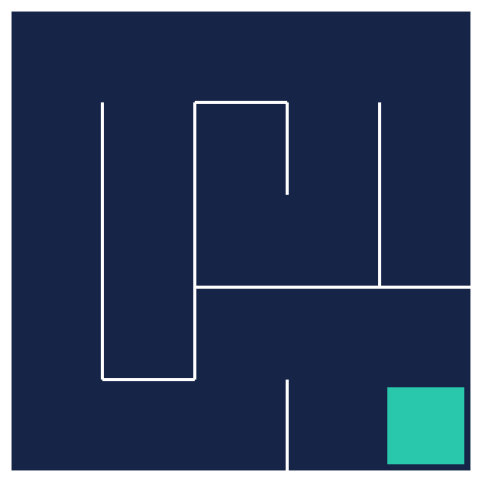

In [6]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(frame)

In [7]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [8]:
policy_probs = np.full((5, 5, 4), 0.25)

In [9]:
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [10]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

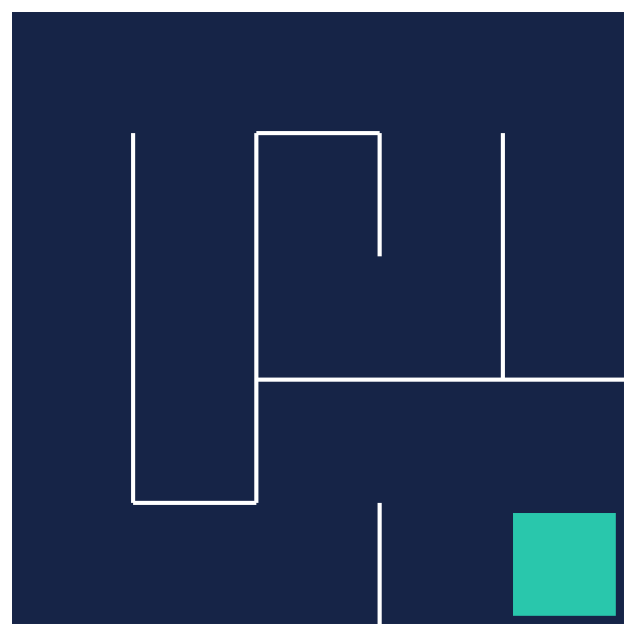

In [11]:
test_agent(env, policy, episodes=1)

#### Plot the policy

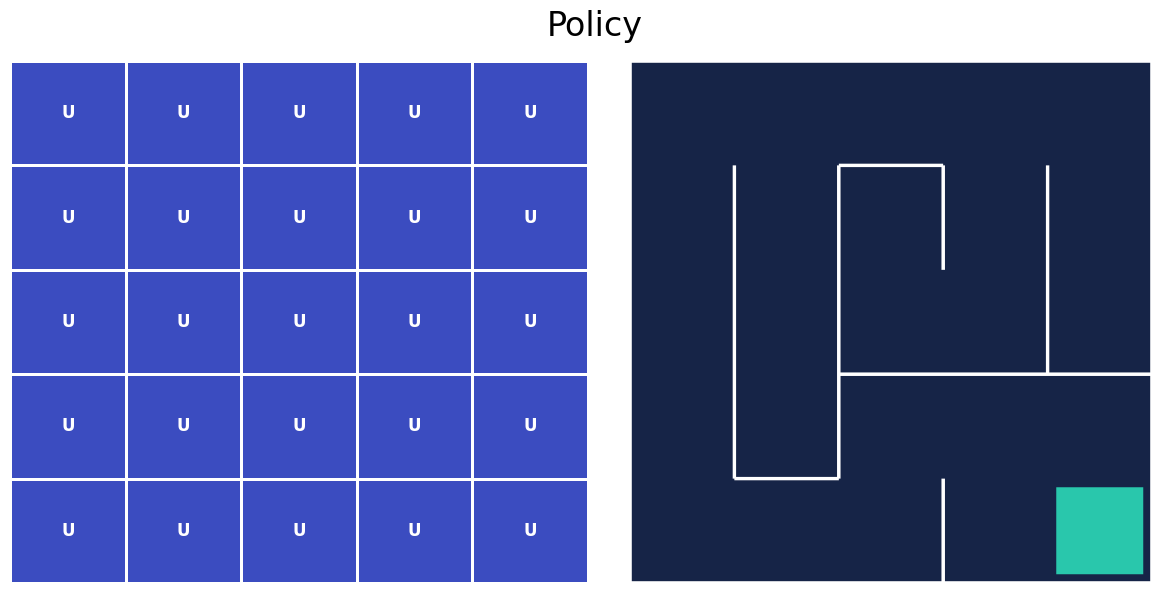

In [12]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [13]:
state_values = np.zeros(shape=(5,5))

#### Plot $V(s)$

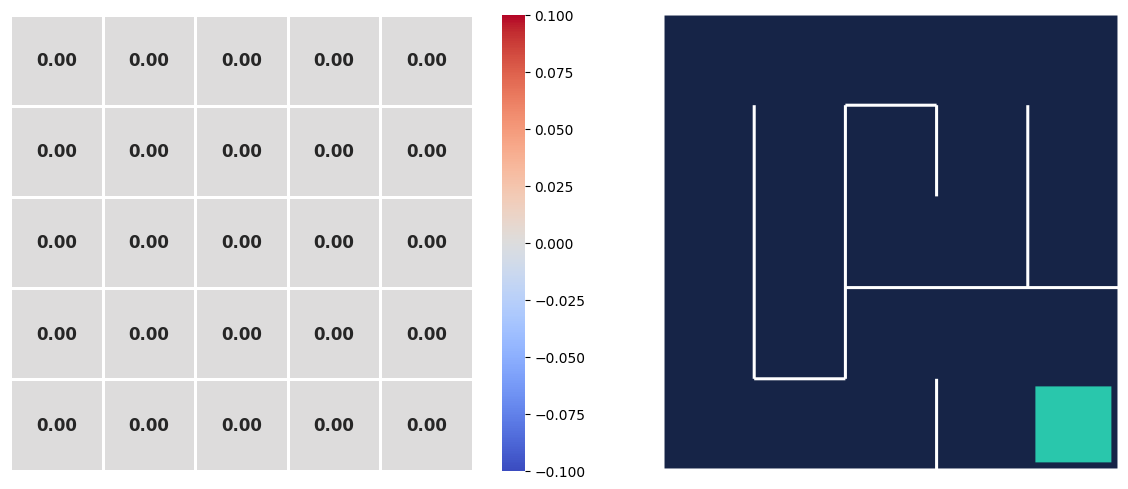

In [14]:
plot_values(state_values, frame)

## Implement the Value Iteration algorithm

</br>


![Screenshot%202021-02-10%20at%2015.36.48.png](attachment:Screenshot%202021-02-10%20at%2015.36.48.png)

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [15]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float('inf')

    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                action_probs = None
                max_qsa = float('-inf')

                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa = reward + gamma * state_values[next_state]
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.

                state_values[(row, col)] = max_qsa
                policy_probs[(row, col)] = action_probs

                delta = max(delta, abs(max_qsa - old_value))

In [16]:
value_iteration(policy_probs, state_values)

## Show results

#### Show resulting value table $V(s)$

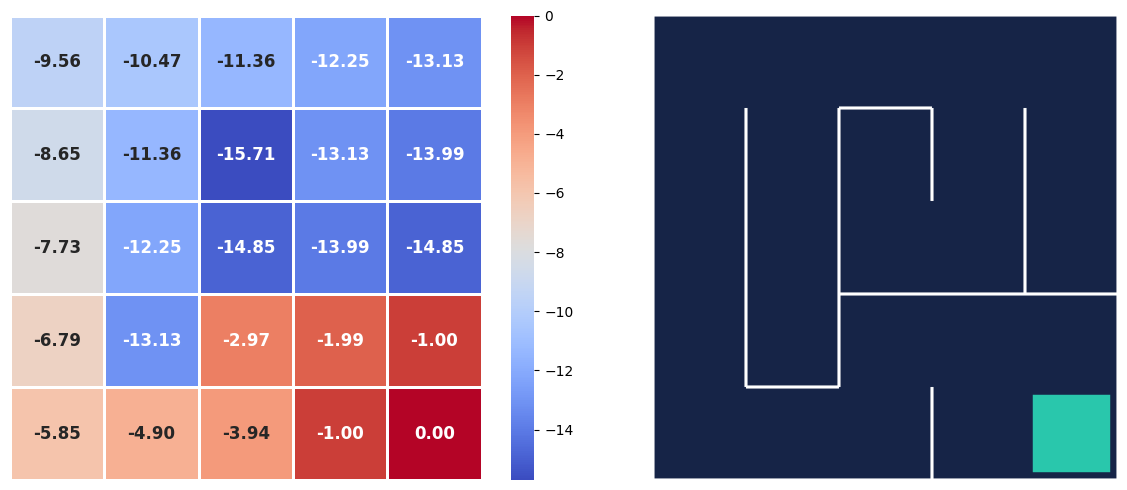

In [17]:
plot_values(state_values, frame)

#### Show resulting policy $\pi(\cdot|s)$

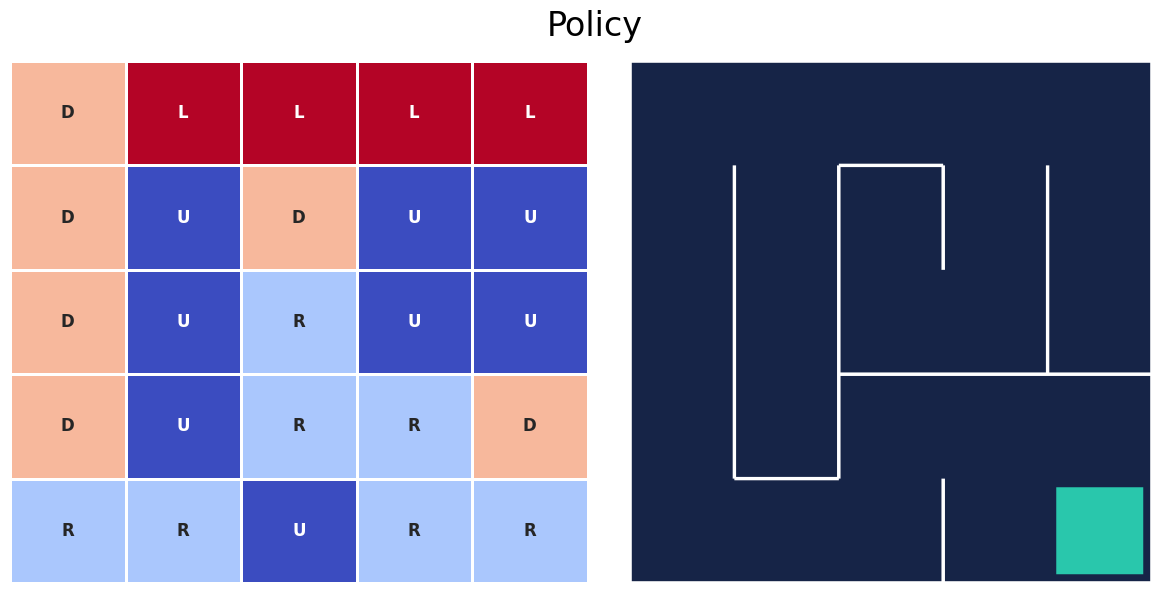

In [18]:
plot_policy(policy_probs, frame)

#### Test the resulting agent

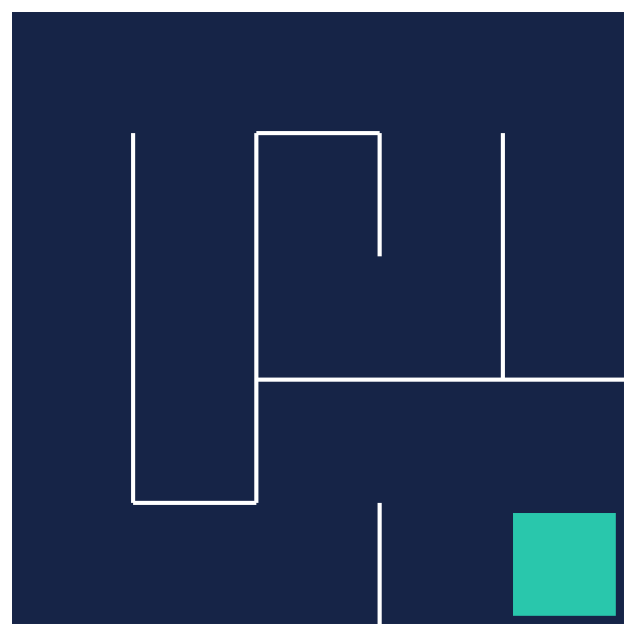

In [19]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)